## [NYCDSA Capstone Project] 
# Women's Softball League Power Ranking Estimate

<br>
Koeun Lim (koeunlim@alum.mit.edu)<br>
Kevin Haghi (kevin.haghi@gmail.com)<br>


# Step 3. Exploratory Data Analysis

---
## Project Description



### Project Outline
- Step 1. Web scraping
- Step 2. Clean data
- Step 3. EDA
- Step 4. Modeling

In [5]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.graph_objects as go
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 250)

In [1]:
%store -r df_ext

In [3]:
df_ext.head()

,RPI_Ranking,College,Conference,Record,Road,Neutral,Home,Non-Div-I,Year,Fielding_Percentage,Scoring,WL_Percentage,Hit_Batters,Earned_Run_Average,Triples_per_Game,Home_Runs_per_game,Slugging_Percentage,Double_Plays_per_Game,On_Base_Percentage,Stolen_Bases_per_Game,Strikeout-to-Walk_Ratio,Batting_Average,Doubles_per_Game,Shutouts,Team_Strikeouts_Per_Seven_Innings,WCWS_Rank,WCWS_in
0,1.0,Oklahoma,Big 12,57-6-0,20-0-0,19-5-0,18-1-0,0-0-0,2019,0.984,7.30,0.905,14.0,1.40,0.30,1.83,0.639,0.25,0.435,0.97,6.50,0.344,1.60,28.0,NaN,2.0,1
1,2.0,UCLA,Pac-12,56-6-0,14-1-0,19-1-0,23-4-0,0-0-0,2019,0.974,7.03,0.903,42.0,1.43,0.21,1.26,0.547,0.23,0.416,0.98,5.52,0.339,1.45,20.0,NaN,1.0,1
2,3.0,Washington,Pac-12,52-9-0,16-1-0,18-5-0,18-3-0,0-0-0,2019,0.980,5.25,0.852,24.0,1.47,0.15,0.79,0.440,0.21,0.383,0.80,5.79,0.297,1.20,24.0,NaN,3.0,1
3,4.0,Arizona,Pac-12,48-14-0,16-2-0,6-5-0,26-7-0,0-0-0,2019,0.976,6.48,0.774,22.0,1.61,0.11,1.77,0.570,0.29,0.398,0.23,3.71,0.318,1.18,15.0,NaN,5.0,1
4,5.0,Florida State,ACC,55-10-0,14-6-0,9-0-0,32-4-0,0-0-0,2019,0.973,6.98,0.846,32.0,1.87,0.28,1.62,0.601,0.37,0.421,1.77,3.74,0.330,1.58,22.0,NaN,9.0,1


#### Pairplot

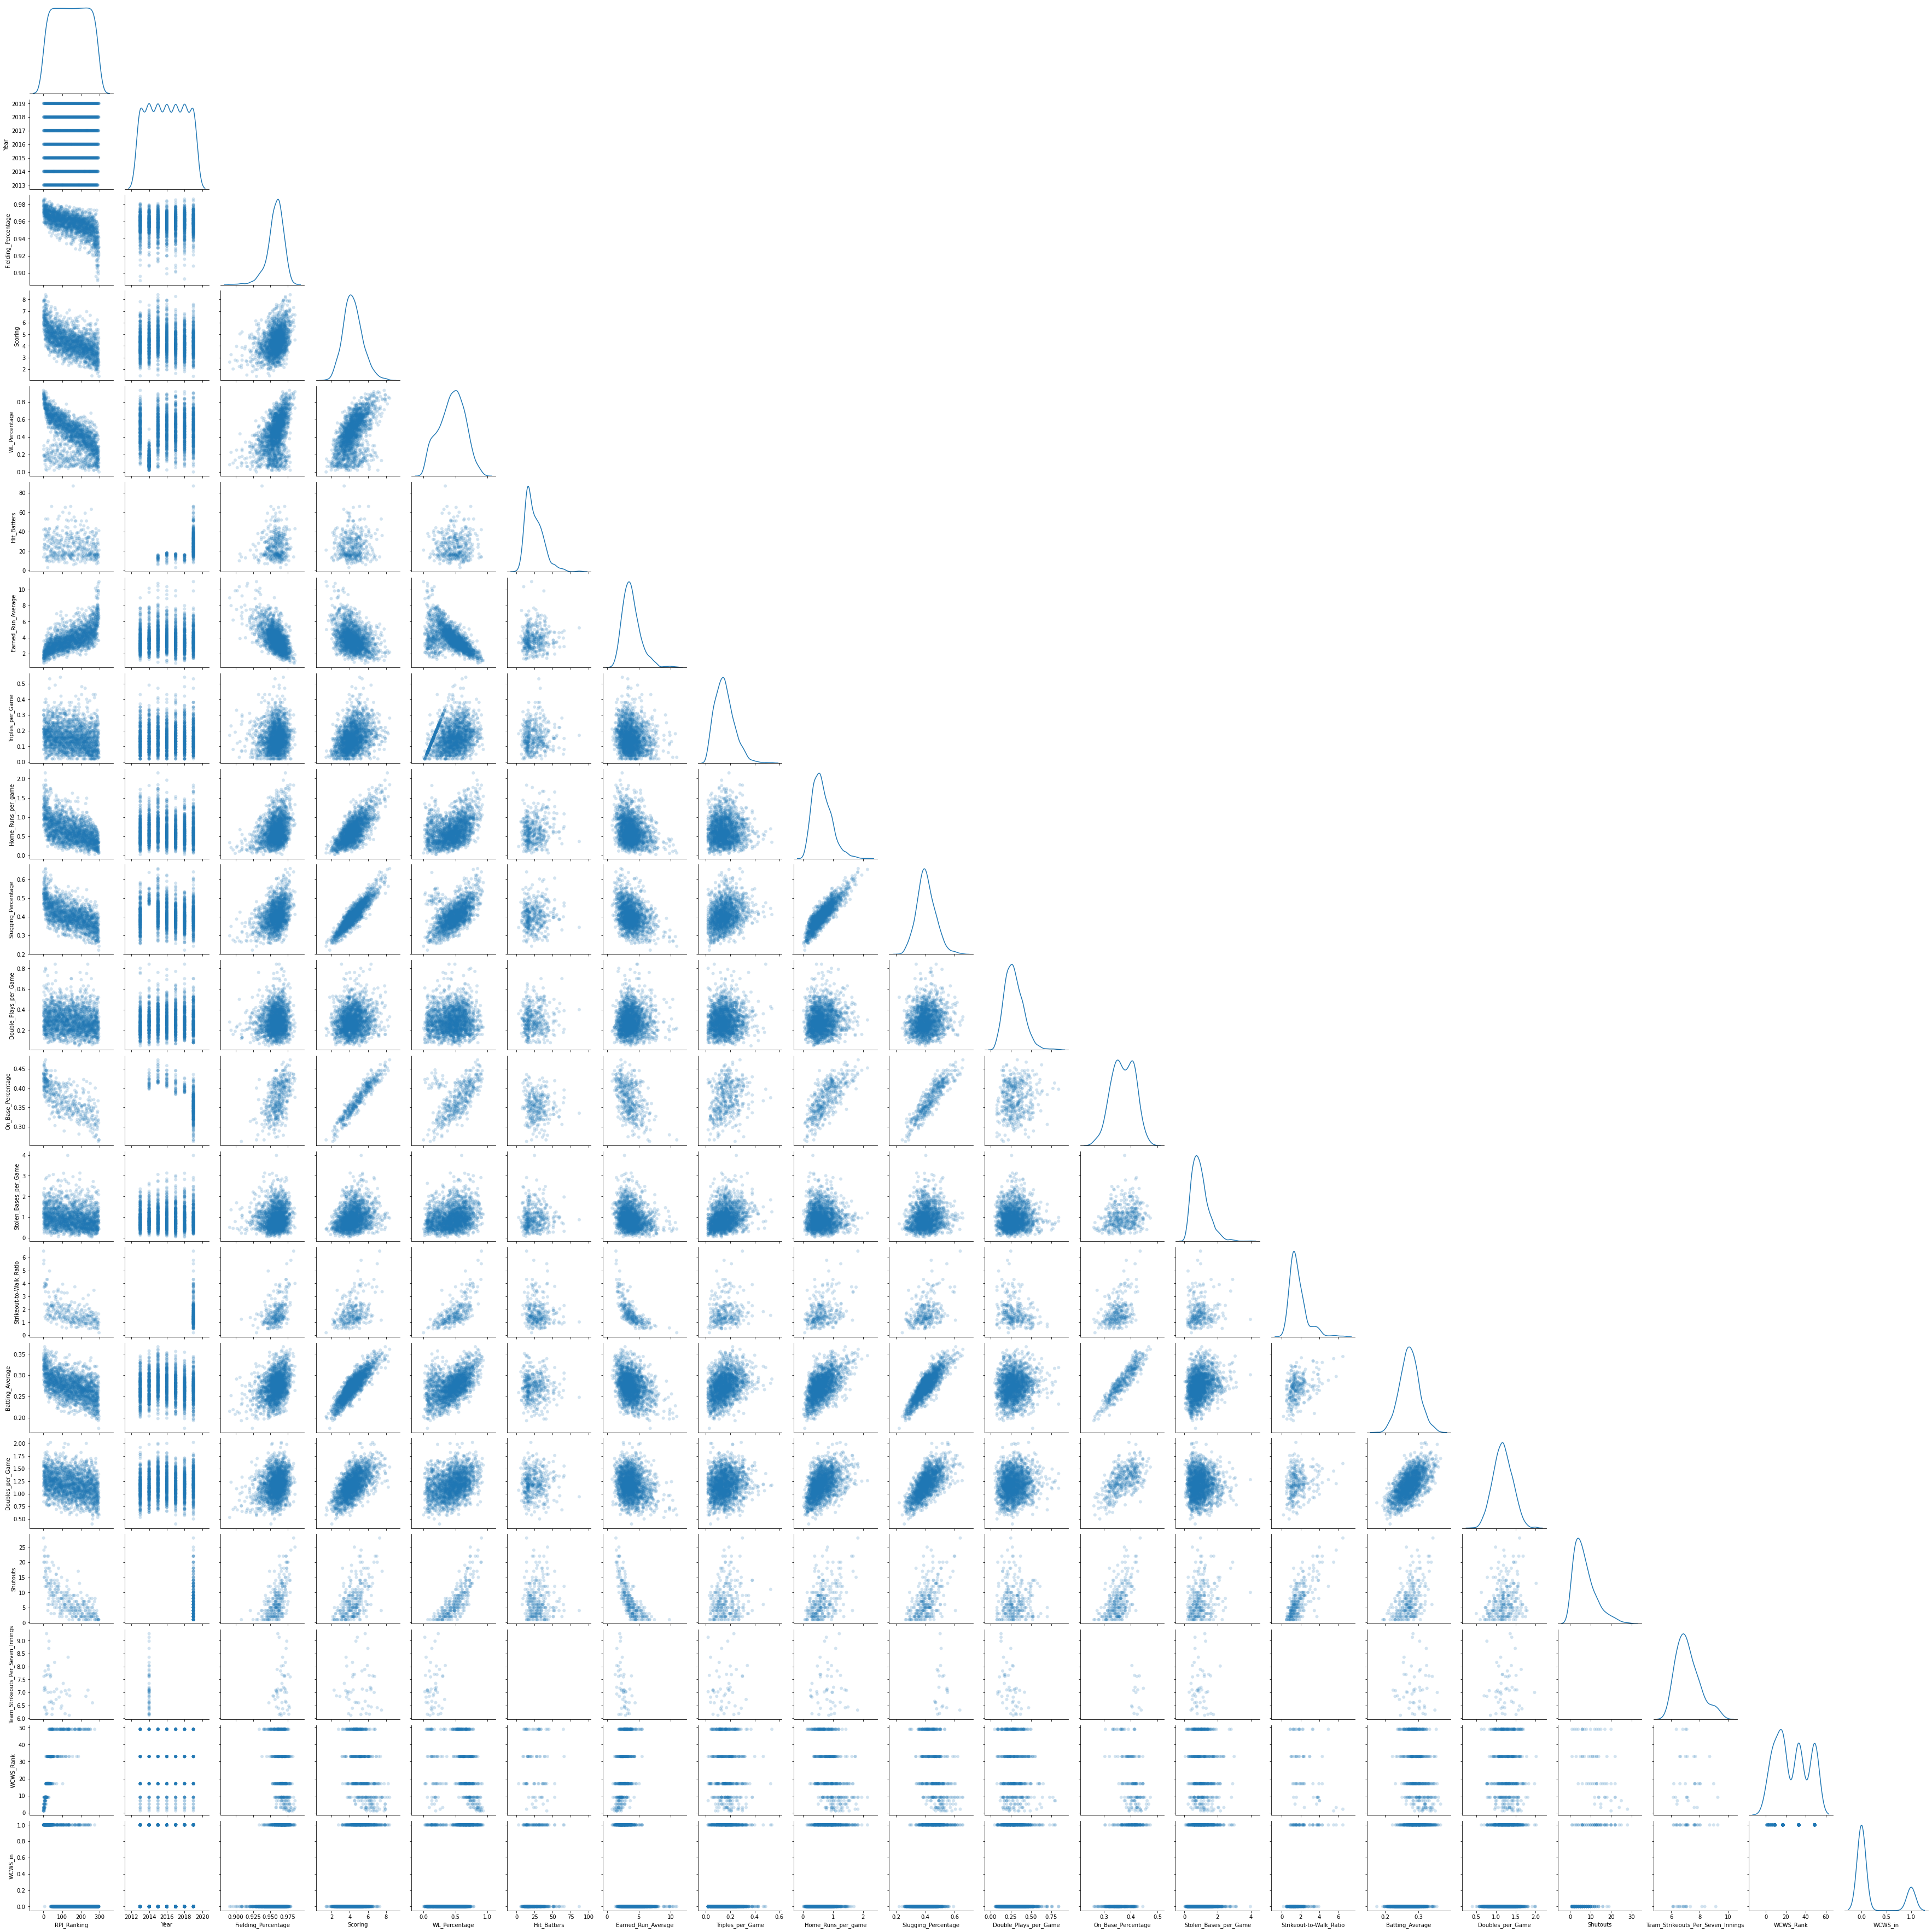

In [7]:
pair_stats = sns.pairplot(data=df_ext,diag_kind='kde',
                         plot_kws=dict(alpha=0.2,edgecolor=[]), diag_kws=dict(shade=False), corner=True)

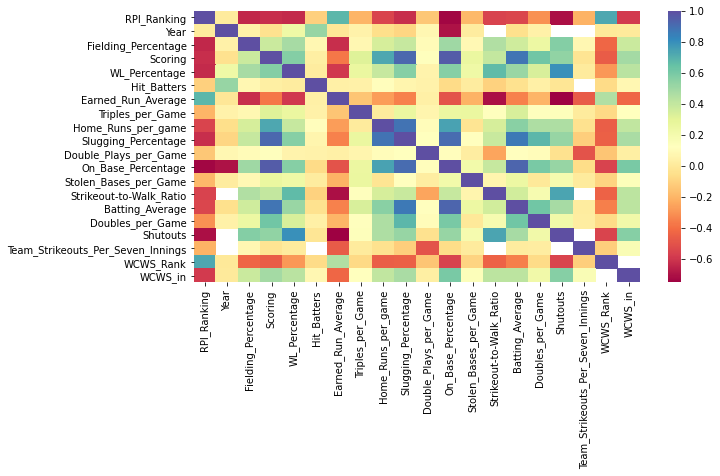

In [8]:
corrMatrix = df_ext.corr()
sns.heatmap(corrMatrix, annot=False, cmap="Spectral")
plt.show()

In [22]:
RPI_corr = pd.DataFrame(corrMatrix.sort_values('RPI_Ranking',ascending=False).RPI_Ranking)
RPI_corr = RPI_corr[abs(RPI_corr)<1]
RPI_corr[abs(RPI_corr)>0.5].dropna()

,RPI_Ranking
WCWS_Rank,0.730059
Earned_Run_Average,0.680490
Batting_Average,-0.545666
Home_Runs_per_game,-0.554588
Strikeout-to-Walk_Ratio,-0.555075
WCWS_in,-0.588741
Scoring,-0.618279
Slugging_Percentage,-0.618551
WL_Percentage,-0.630335
Fielding_Percentage,-0.638005


In [25]:
corr_sorted = pd.DataFrame(corrMatrix.unstack().sort_values(kind="quicksort",ascending=False).drop_duplicates())
corr_sorted.columns = ['rho']
corr_sorted = corr_sorted[abs(corr_sorted)<1]
corr_sorted[abs(corr_sorted)>0.6].dropna()

rho
Scoring                 On_Base_Percentage       0.954298
On_Base_Percentage      Batting_Average          0.924886
Slugging_Percentage     Scoring                  0.918692
On_Base_Percentage      Slugging_Percentage      0.908240
Slugging_Percentage     Home_Runs_per_game       0.887002
Batting_Average         Scoring                  0.883484
                        Slugging_Percentage      0.865616
WL_Percentage           Shutouts                 0.799732
Home_Runs_per_game      On_Base_Percentage       0.741296
Shutouts                Strikeout-to-Walk_Ratio  0.737138
Home_Runs_per_game      Scoring                  0.732356
WCWS_Rank               RPI_Ranking              0.730059
Earned_Run_Average      RPI_Ranking              0.680490
Doubles_per_Game        Slugging_Percentage      0.678533
Strikeout-to-Walk_Ratio WL_Percentage            0.669239
Batting_Average         Doubles_per_Game         0.619858
Doubles_per_Game        Scoring                  0.616650
Scoring                 RPI_Ranking             -0.618279
RPI_Ranking             Slugging_Percentage     -0.618551
Earned_Run_Average      Fielding_Percentage     -0.619285
WL_Percentage           RPI_Ranking             -0.630335
RPI_Ranking             Fielding_Percentage     -0.638005
Year                    On_Base_Percentage      -0.701301
Earned_Run_Average      Strikeout-to-Walk_Ratio -0.709243
RPI_Ranking             Shutouts                -0.712039
On_Base_Percentage      RPI_Ranking             -0.738216
Earned_Run_Average      Shutouts                -0.753302